In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math

# Question 2 - Part 1 & Part 2

In [2]:
df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')
df  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.shape[0]

41188

In [5]:
#One hot encoding implementation
features=df.columns
features=features[:-1]
target=df.columns[-1]
one_hot_features=pd.get_dummies(df[features])

In [6]:
def splitting(features,target,p):
  splitting_index= int(p * features.shape[0])
  train_X=features[0:splitting_index]
  train_y=target[0:splitting_index]
  test_X=features[splitting_index:]
  test_y= target[splitting_index:]
  return train_X,train_y,test_X,test_y

In [18]:
def accuracy(expected,predicted):
  correct_predictions=expected == predicted
  cp_sum=correct_predictions.sum()
  accuracy= cp_sum/expected.shape[0]
  return accuracy


In [8]:
def impurity_cal(tree,test_X,test_y):
  w_gini=0
  leaves=tree.apply(test_X)
  for l in np.unique(leaves):
    total=test_y[leaves==l].size
    yes=(test_y[leaves==l]=='yes').sum()
    no=total-yes
    p_yes= yes/total
    p_no=no/total
    gini=p_yes*(1-p_yes)+p_no*(1-p_no)
    w_gini += gini* (total/test_y.shape[0])
  return w_gini

In [9]:
train_X,train_y,test_X,test_y= splitting(one_hot_features,df[target],0.7)

In [10]:
print(train_X.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [19]:
cp=[]
ta=[]
imp=[]
for alpha in range(0,30,1):
  tree = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha*0.0001)
  tree.fit(train_X,train_y)
  cp.append(alpha*0.0001)
  ta.append(accuracy(test_y, tree.predict(test_X)))
  imp.append(impurity_cal(tree,train_X,train_y))
  print('ccp_alpha ',alpha*0.0001,'Training Accurace',accuracy(train_y.to_numpy(),tree.predict(train_X)),' Test Accuracy ',accuracy(test_y,tree.predict(test_X)),sep='\t')

ccp_alpha 	0.0	Training Accurace	1.0	 Test Accuracy 	0.7413611718054544
ccp_alpha 	0.0001	Training Accurace	0.9549790156428843	 Test Accuracy 	0.7612689164036578
ccp_alpha 	0.0002	Training Accurace	0.9523429641705109	 Test Accuracy 	0.7530954115076475
ccp_alpha 	0.00030000000000000003	Training Accurace	0.9521348548437446	 Test Accuracy 	0.753176337298697
ccp_alpha 	0.0004	Training Accurace	0.9514758419756512	 Test Accuracy 	0.7657198349113863
ccp_alpha 	0.0005	Training Accurace	0.9514758419756512	 Test Accuracy 	0.7657198349113863
ccp_alpha 	0.0006000000000000001	Training Accurace	0.950920883770941	 Test Accuracy 	0.7627255806425508
ccp_alpha 	0.0007	Training Accurace	0.950920883770941	 Test Accuracy 	0.7627255806425508
ccp_alpha 	0.0008	Training Accurace	0.950920883770941	 Test Accuracy 	0.7627255806425508
ccp_alpha 	0.0009000000000000001	Training Accurace	0.950920883770941	 Test Accuracy 	0.7627255806425508
ccp_alpha 	0.001	Training Accurace	0.950920883770941	 Test Accuracy 	0.762725

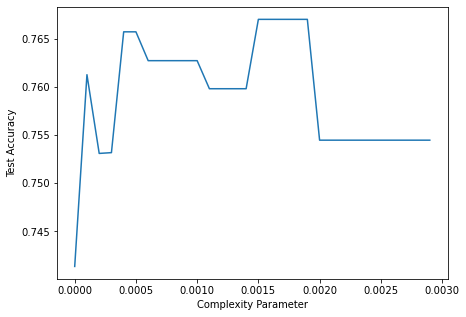

In [15]:
plt.figure(figsize=(7,5))
plt.plot(cp,ta)
plt.xlabel('Complexity Parameter')
plt.ylabel('Test Accuracy')
plt.show()

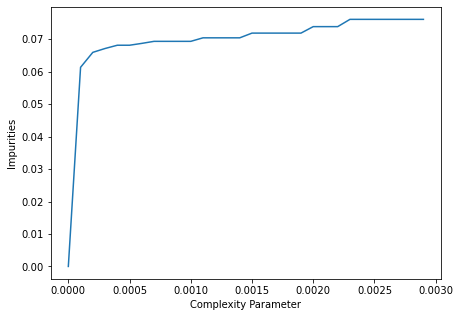

In [14]:
plt.figure(figsize=(7,5))
plt.plot(cp,imp)
plt.xlabel('Complexity Parameter')
plt.ylabel('Impurities')
plt.show()

# Question 2 - Part 3

In [16]:
tree3= DecisionTreeClassifier(random_state=0)
a=tree3.cost_complexity_pruning_path(train_X, train_y)

In [20]:
for x in range(0,510,25):
  tree = DecisionTreeClassifier(random_state=0,ccp_alpha=a['ccp_alphas'][x])
  tree.fit(train_X,train_y)
  print('ccp_alpha ',a['ccp_alphas'][x],'Training Accurace',accuracy(train_y.to_numpy(),tree.predict(train_X)),' Test Accuracy ',accuracy(test_y,tree.predict(test_X)),sep='\t')

ccp_alpha 	0.0	Training Accurace	1.0	 Test Accuracy 	0.7413611718054544
ccp_alpha 	2.601366584579099e-05	Training Accurace	0.9986126044882245	 Test Accuracy 	0.7394189528202638
ccp_alpha 	3.030955663498314e-05	Training Accurace	0.9976067427421872	 Test Accuracy 	0.7429796876264465
ccp_alpha 	3.1448164394220426e-05	Training Accurace	0.9964621414449725	 Test Accuracy 	0.7433843165816946
ccp_alpha 	3.220739580907457e-05	Training Accurace	0.9950747459331969	 Test Accuracy 	0.7440317229100915
ccp_alpha 	3.303359491908052e-05	Training Accurace	0.9940341992993653	 Test Accuracy 	0.7491300477462167
ccp_alpha 	3.641913218410739e-05	Training Accurace	0.9925774340120009	 Test Accuracy 	0.7489681961641175
ccp_alpha 	4.162186535326558e-05	Training Accurace	0.9902535465297769	 Test Accuracy 	0.7467831998057781
ccp_alpha 	4.624651705918398e-05	Training Accurace	0.9872359612916652	 Test Accuracy 	0.7458120903131829
ccp_alpha 	4.624651705918398e-05	Training Accurace	0.9872359612916652	 Test Accuracy 	0